<a href="https://colab.research.google.com/github/abhishek-chaudhary26/austin_housing_price_prediction/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

import pickle

In [2]:
df = pd.read_csv('/workspace/austin_housing_price_prediction/dataset/austinHousingData.csv')
df.head(2)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...


In [3]:
df.isnull().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   2
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [32]:
data = df.drop(['homeImage', 'numOfPhotos' ,'zpid' , 'zipcode' , 'longitude' , 'latitude' , 'description' ,'latest_salemonth' , 'latest_saleyear' , 'latest_saledate' , 'numPriceChanges'] , axis = 1)
data_cleaned = data.dropna()
homeImage = df['homeImage']

In [5]:
import json

# options list
option = {
                        
'city' : data['city'].dropna().unique().tolist()   ,                      
'streetAddress' : data['city'].dropna().unique().tolist() ,
'Yes_no': ['Yes' , 'No']                                                             
}

with open('options.json', 'w') as file:
    json.dump(option, file, indent=4)

print("Options saved to options.json!")
print(json.dumps(option, indent=1))

Options saved to options.json!
{
 "city": [
  "pflugerville",
  "del valle",
  "austin",
  "driftwood",
  "manor",
  "dripping springs",
  "manchaca",
  "west lake hills",
  "road"
 ],
 "streetAddress": [
  "pflugerville",
  "del valle",
  "austin",
  "driftwood",
  "manor",
  "dripping springs",
  "manchaca",
  "west lake hills",
  "road"
 ],
 "Yes_no": [
  "Yes",
  "No"
 ]
}


In [6]:
data_cleaned.duplicated().sum()

np.int64(0)

In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        15171 non-null  object 
 1   streetAddress               15171 non-null  object 
 2   propertyTaxRate             15171 non-null  float64
 3   garageSpaces                15171 non-null  int64  
 4   hasAssociation              15171 non-null  bool   
 5   hasCooling                  15171 non-null  bool   
 6   hasGarage                   15171 non-null  bool   
 7   hasHeating                  15171 non-null  bool   
 8   hasSpa                      15171 non-null  bool   
 9   hasView                     15171 non-null  bool   
 10  homeType                    15171 non-null  object 
 11  parkingSpaces               15171 non-null  int64  
 12  yearBuilt                   15171 non-null  int64  
 13  latestPrice                 151

In [8]:
data_cleaned['latestPrice']

0        305000.0
1        295000.0
2        256125.0
3        240000.0
4        239900.0
           ...   
15166    330000.0
15167    550000.0
15168    875000.0
15169    420000.0
15170    374900.0
Name: latestPrice, Length: 15171, dtype: float64

In [9]:
data_cleaned.describe()

,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,0.012985,3.474722,1.710105,0.663371,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,0.179438,1.893351,0.788641,0.983779,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,0.000000,2.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,0.000000,3.000000,2.000000,0.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,0.000000,4.000000,2.000000,1.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,8.000000,12.000000,6.000000,8.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [10]:
# data_cleaned['description'].head()

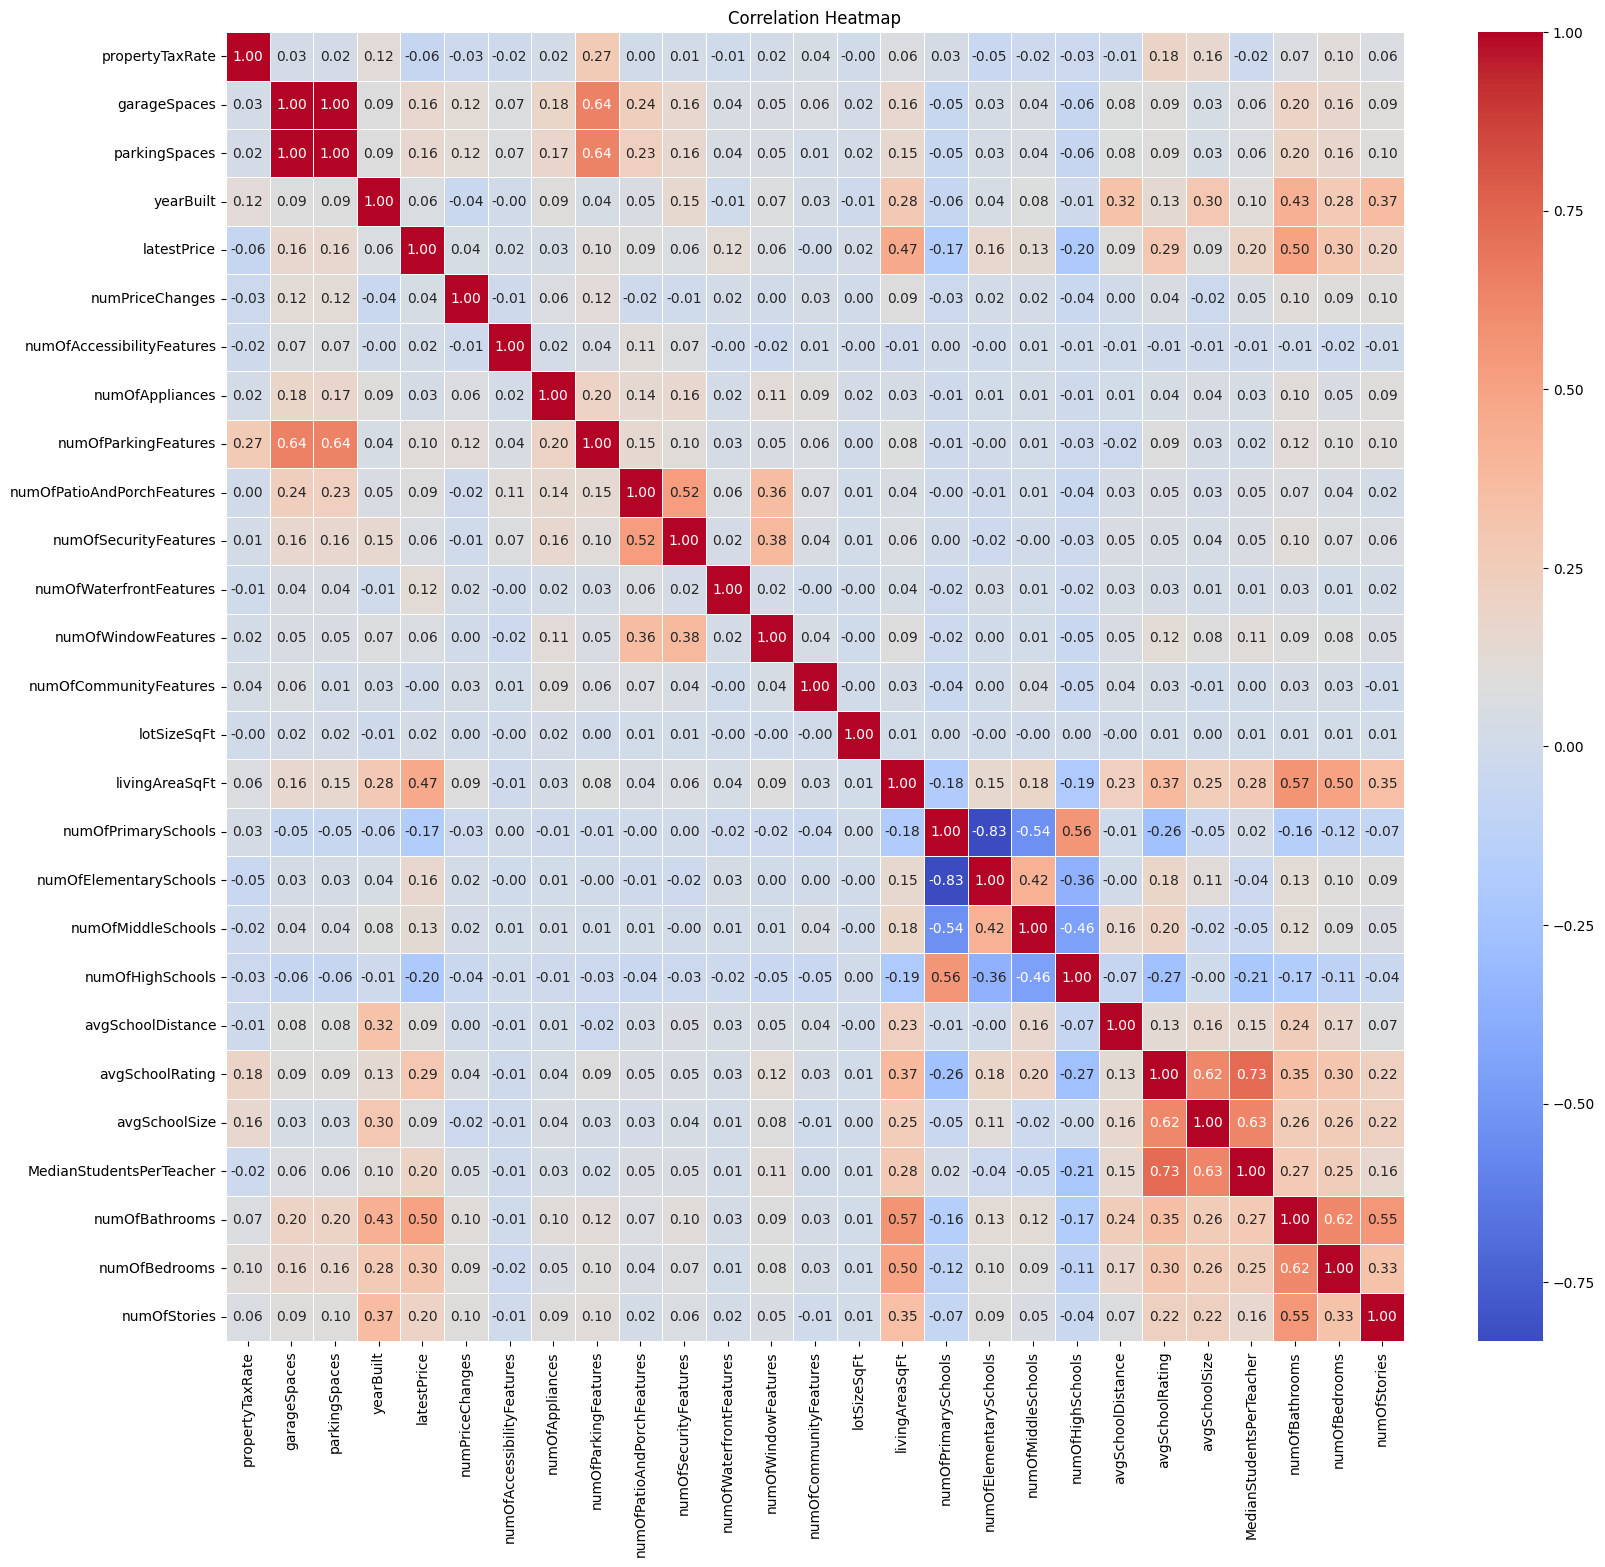

In [11]:
# Select only numeric columns
numeric_df = data_cleaned.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_df.corr()


plt.figure(figsize=(19, 17))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

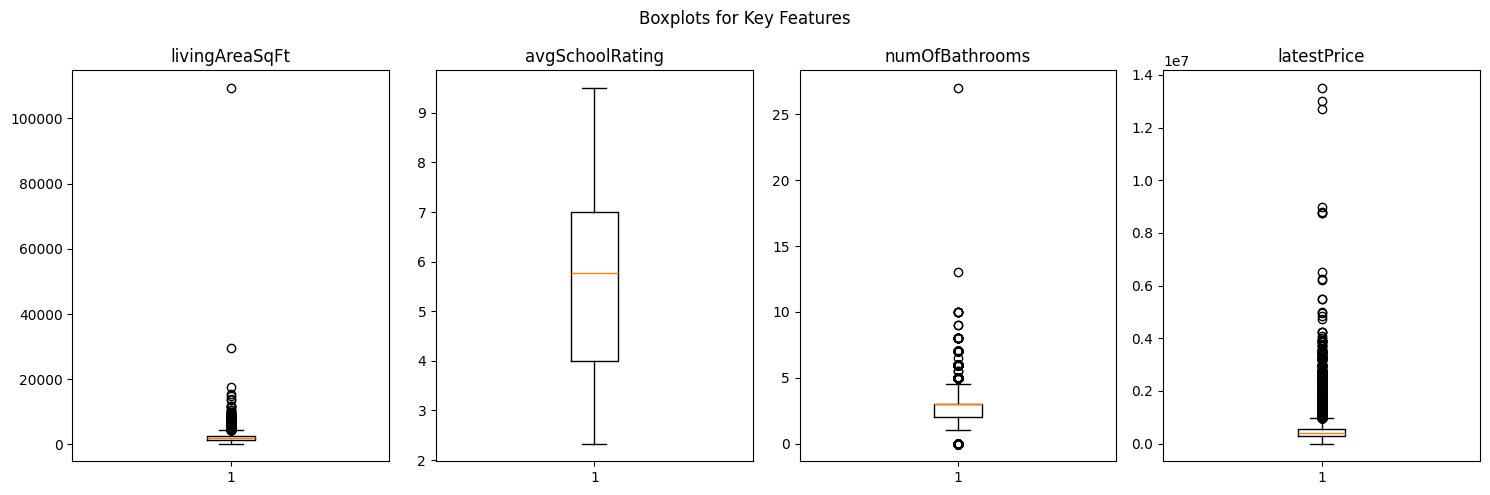

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# Boxplot for livingAreaSqFt
axs[0].boxplot(data_cleaned['livingAreaSqFt'])
axs[0].set_title("livingAreaSqFt")

# Boxplot for avgSchoolRating
axs[1].boxplot(data_cleaned['avgSchoolRating'])
axs[1].set_title("avgSchoolRating")

# Boxplot for numOfBathrooms
axs[2].boxplot(data_cleaned['numOfBathrooms'])
axs[2].set_title("numOfBathrooms")

# Boxplot for latestsaleprice
axs[3].boxplot(data_cleaned['latestPrice'])
axs[3].set_title("latestPrice")

# Customize the figure
fig.suptitle("Boxplots for Key Features")
plt.tight_layout()
plt.show()

In [13]:
# Remove outliers
size_before_remove = data.shape[0]
data_cleaned = data_cleaned[(data_cleaned["numOfBedrooms"] >= 1) & (data_cleaned["numOfBedrooms"] <= 6)]
data_cleaned = data_cleaned[(data_cleaned["numOfBathrooms"] >= 1) & (data_cleaned["numOfBathrooms"] <= 5)]
data_cleaned = data_cleaned[data_cleaned["livingAreaSqFt"] <= 20000]
data_cleaned = data_cleaned[data_cleaned["latestPrice"] <= 1000000]

print("Number of outliers:",  size_before_remove - data.shape[0])

Number of outliers: 0


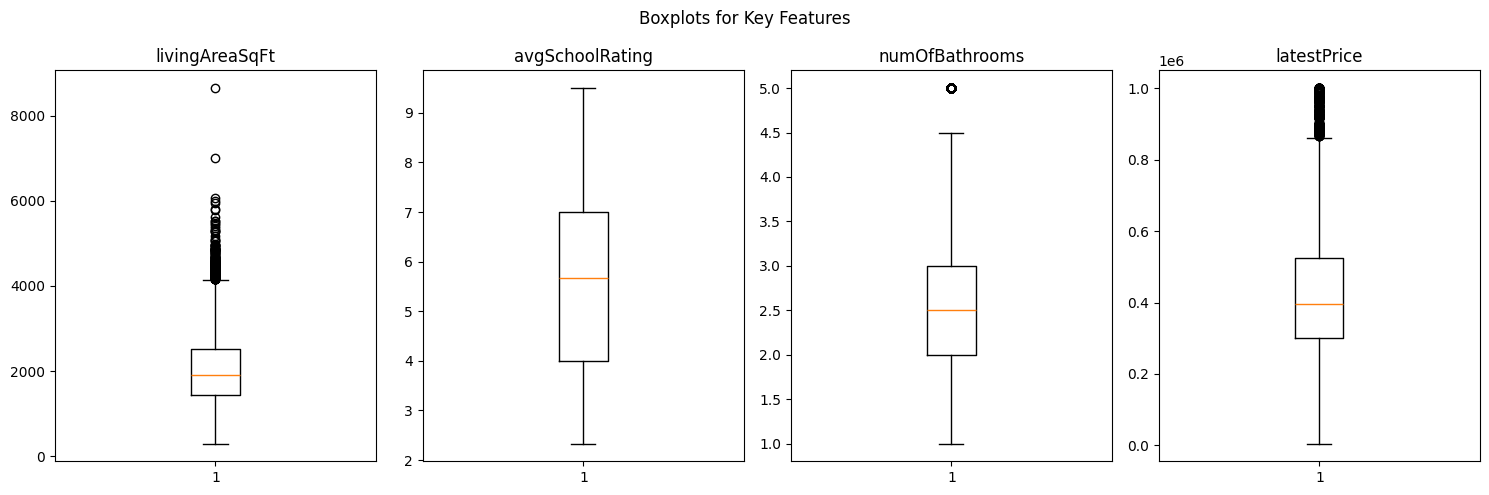

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# Boxplot for livingAreaSqFt
axs[0].boxplot(data_cleaned['livingAreaSqFt'])
axs[0].set_title("livingAreaSqFt")

# Boxplot for avgSchoolRating
axs[1].boxplot(data_cleaned['avgSchoolRating'])
axs[1].set_title("avgSchoolRating")

# Boxplot for numOfBathrooms
axs[2].boxplot(data_cleaned['numOfBathrooms'])
axs[2].set_title("numOfBathrooms")

# Boxplot for latestsaleprice
axs[3].boxplot(data_cleaned['latestPrice'])
axs[3].set_title("latestPrice")

# Customize the figure
fig.suptitle("Boxplots for Key Features")
plt.tight_layout()
plt.show()

In [15]:
# Count encoding for homeType
import category_encoders as ce
count_encoder = ce.CountEncoder()
data_cleaned['homeType_count'] = count_encoder.fit_transform(data_cleaned['homeType'])

# # Convert date string to timestamp
# data_cleaned['latest_saledate'] = pd.to_datetime(data_cleaned['latest_saledate'])
# data_cleaned['latest_saledate'] = data_cleaned['latest_saledate'].apply(lambda x: int(x.timestamp()))

In [16]:
X = data_cleaned.drop(['latestPrice'] , axis = 1)
y = data_cleaned["latestPrice"]

In [17]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

In [18]:
with open('label_encode.pkl', 'wb') as file:
    pickle.dump(label_encoder , file)

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state= 4)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (11223, 37)
X_test shape: (2806, 37)
y_train shape: (11223,)
y_test shape: (2806,)


# #  random forest

In [20]:
# Initialize the model
random_forest_model = RandomForestRegressor(n_estimators=30, random_state=100)

# Train the model
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=30, random_state=100)

In [21]:
with open("random_model.pickle" , 'wb') as f:
    pickle.dump(random_forest_model, f)

In [22]:
y_pred = random_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 8873962079.37
Root Mean Squared Error (RMSE): 94201.71
R² Score: 0.73


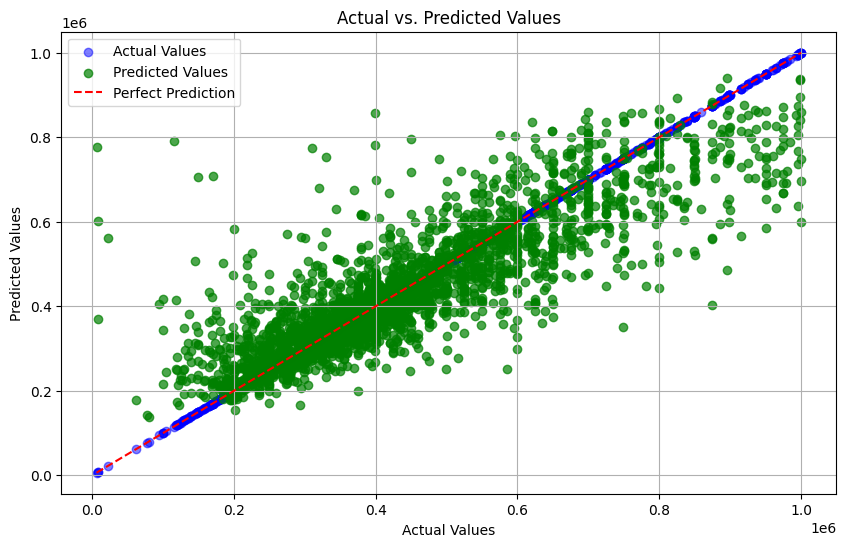

In [23]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted Values')

# Line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid()
plt.show()


# KNN


In [24]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(5, 11)  # k values from 1 to 20

In [26]:
results = {}

# Iterate over distance metrics and k values
for metric in metrics:
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k, metric=metric)
        scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = np.mean(-scores)  # Convert negative MSE to positive
        results[(metric, k)] = mean_score
#         print(f'Metric: {metric}, k: {k}, Mean MSE: {mean_score:.4f}')

# Identify the best combination
best_combination = min(results, key=results.get)
print(f'Best combination: Metric: {best_combination[0]}, k: {best_combination[1]}, Mean MSE: {results[best_combination]:.4f}')

Best combination: Metric: manhattan, k: 9, Mean MSE: 13433480678.2367


In [27]:
knn = KNeighborsRegressor(n_neighbors=10, metric='manhattan')
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(metric='manhattan', n_neighbors=10)

In [28]:
with open("Knn.pickle" , 'wb') as f:
    pickle.dump(knn , f)

In [29]:
y_pred_k = knn.predict(X_test_scaled)

In [30]:
mse = mean_squared_error(y_test, y_pred_k)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred_k)
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 13101270964.642786
R² Score: 0.61


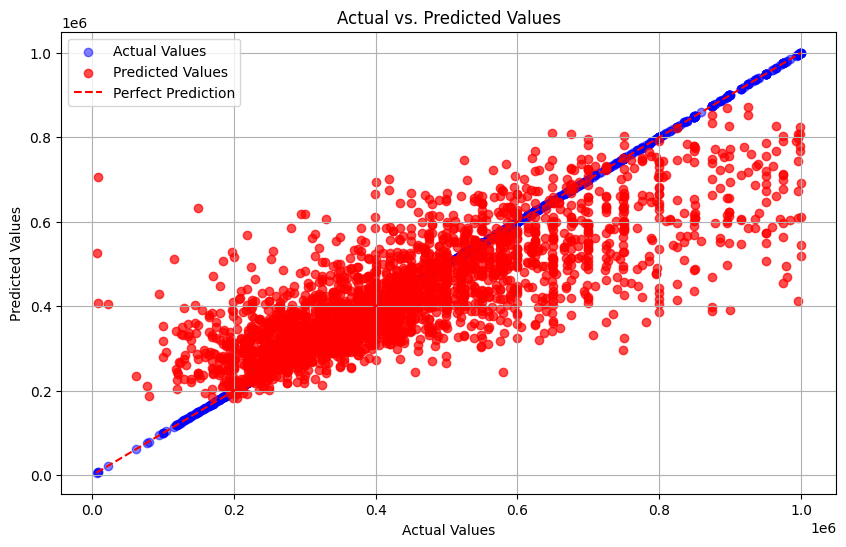

In [31]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test, y_pred_k, color='red', alpha=0.7, label='Predicted Values')

# Line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid()
plt.show()